In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
import sklearn.datasets
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error

In [52]:
california_data = sklearn.datasets.fetch_california_housing()
data = pd.DataFrame(california_data.data, columns=california_data.feature_names)
data['Target'] = california_data.target

In [53]:
data.shape

(20640, 9)

In [54]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [55]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [56]:
data.corr()['Target']

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
Target        1.000000
Name: Target, dtype: float64

<Axes: >

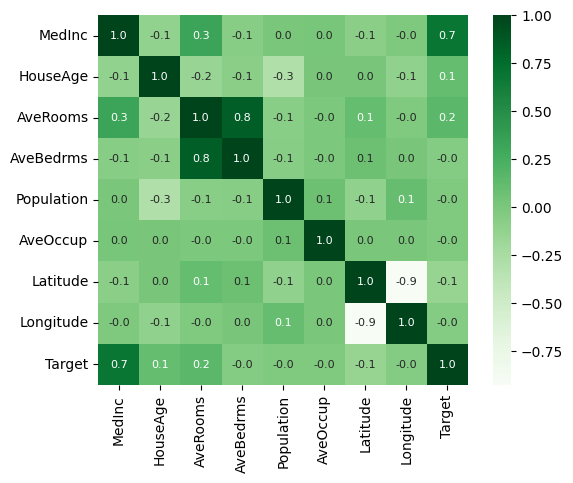

In [57]:
sns.heatmap(data.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

In [60]:
X = data.drop('Target', axis=1)
Y = data['Target']

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size=0.2, random_state=3)

In [ ]:
model = XGBRegressor()
model.fit(X_train, Y_train)

# Train R2Score
train_predictions = model.predict(X_train)
print("Training R2 Score: ", r2_score(train_predictions, Y_train))
print("Training RMSE: ", root_mean_squared_error(train_predictions, Y_train))

# Train R2Score
test_predictions = model.predict(X_test)
print("Test R2 Score: ",r2_score(test_predictions, Y_test))
print("Test RMSE: ",root_mean_squared_error(test_predictions, Y_test))

Training R2 Score:  0.9375764652450341
Training RMSE:  0.27350381065232254
Test R2 Score:  0.8112034657531827
Test RMSE:  0.4620005060660003
